Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   C

<ipython-input-5-80cea07b54de>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.values, y=category_sales.index, palette="viridis")


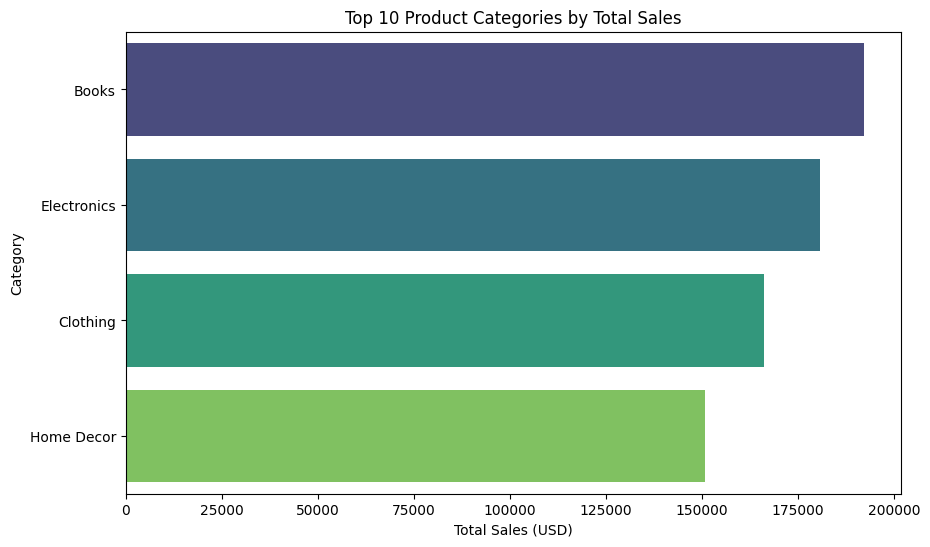

<ipython-input-5-80cea07b54de>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_transactions.index, y=region_transactions.values, palette="cool")


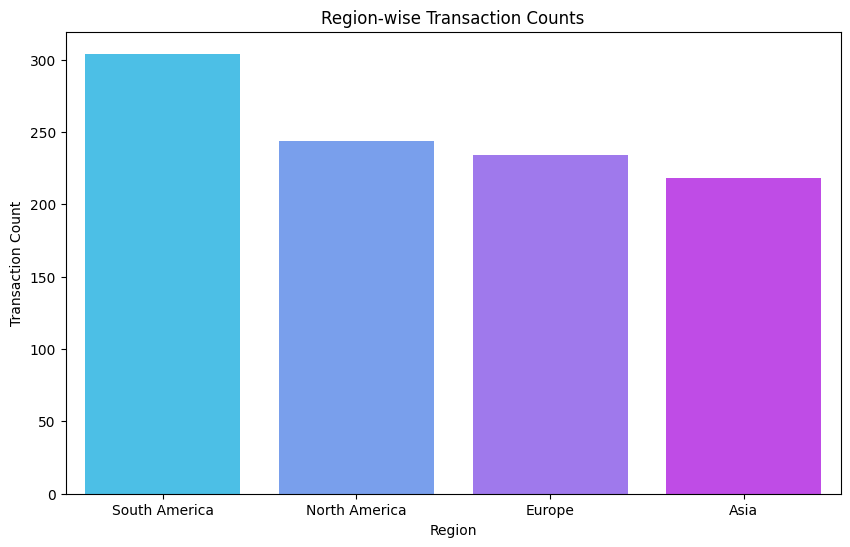

<ipython-input-5-80cea07b54de>:62: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  transaction_trends = merged_data.set_index("TransactionDate").resample("M")["TotalValue"].sum()


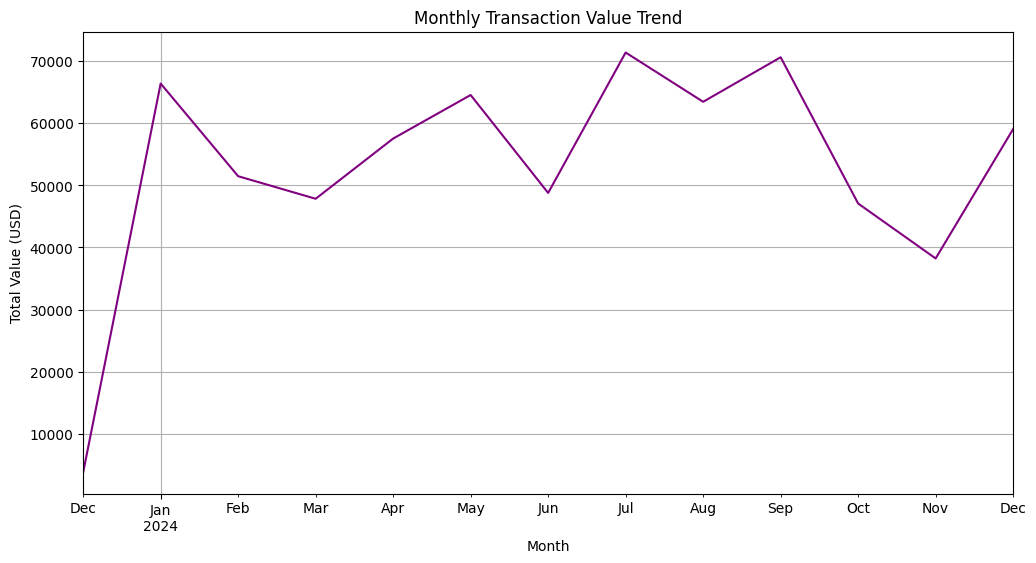

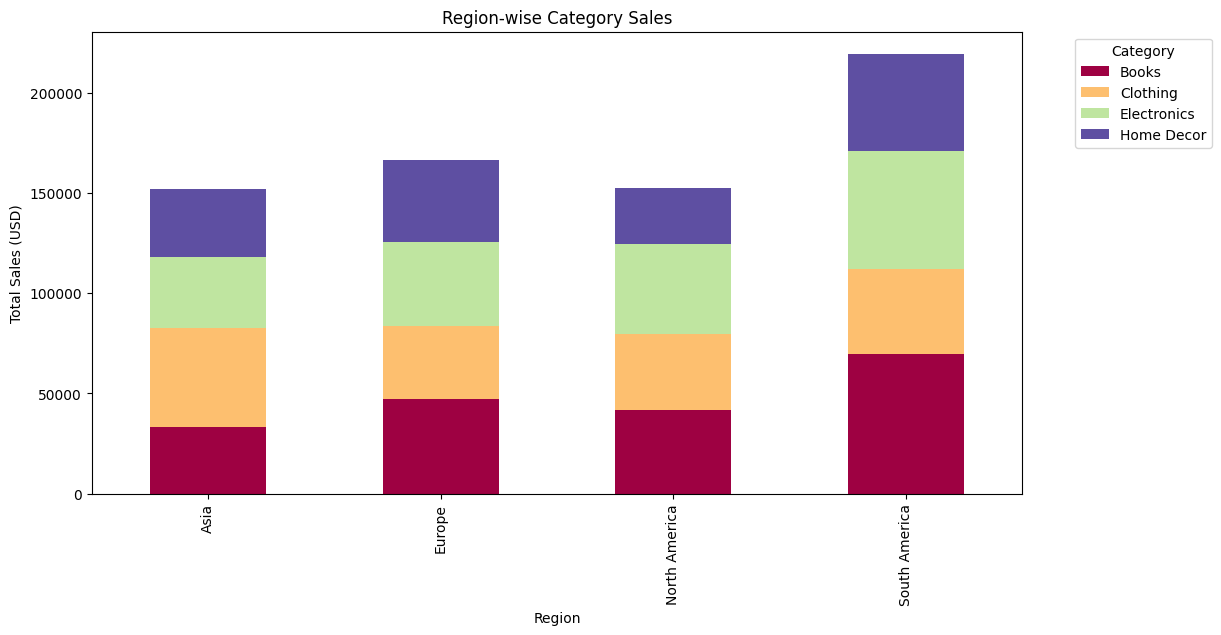

<ipython-input-5-80cea07b54de>:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index, y=top_customers.values, palette='cool')


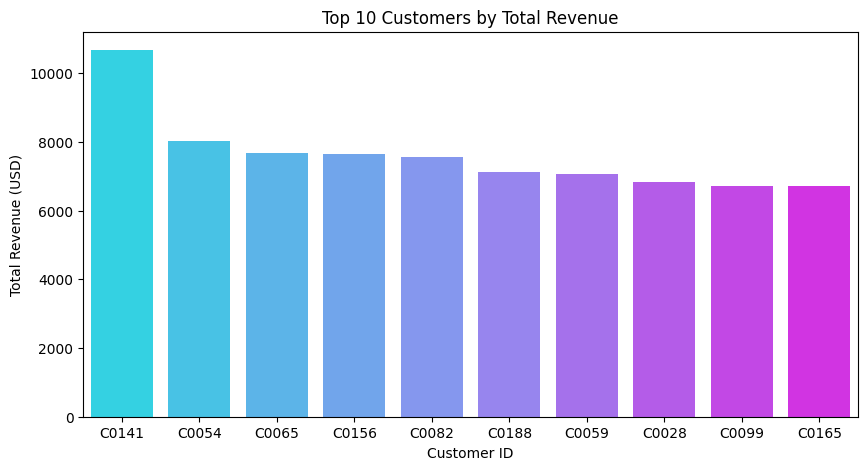

<ipython-input-5-80cea07b54de>:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=high_demand_categories.values, y=high_demand_categories.index, palette="magma")


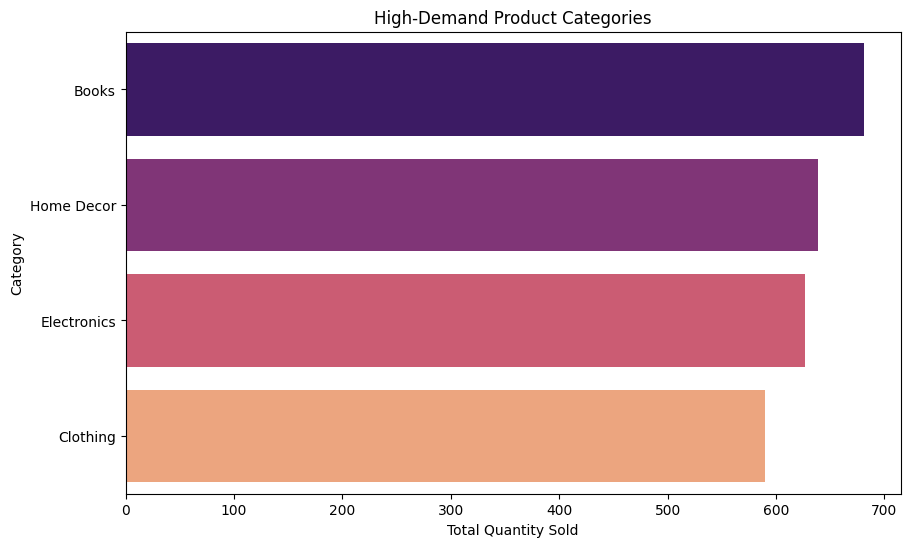

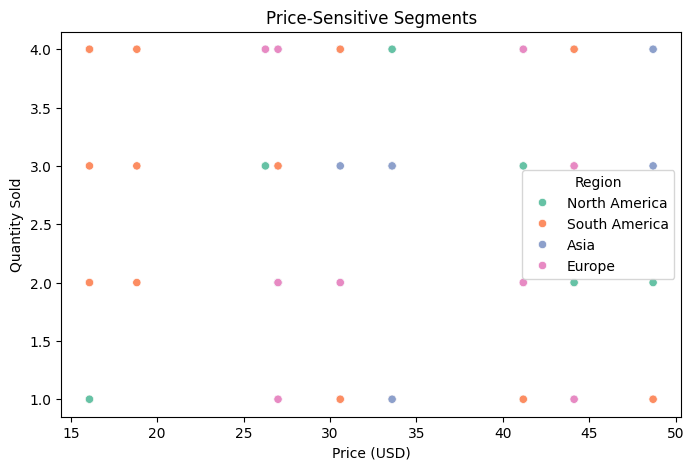

Most demanded category: Books
Revenue from South America: 219352.56 USD
Highest transaction value month: 2024-07-31 00:00:00
Average transaction value by region:
Region
Asia             697.591606
Europe           710.489872
North America    624.235246
South America    721.554474
Name: TotalValue, dtype: float64
Top 5 bulk purchased low-price products:
ProductID
P003    31
P035    26
P078    26
P063    25
P073    24
Name: Quantity, dtype: int64


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load data
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Display basic information about each dataset
print("Customers Dataset Info:")
print(customers.info())
print("\nProducts Dataset Info:")
print(products.info())
print("\nTransactions Dataset Info:")
print(transactions.info())

# Check for missing values
print("\nMissing Values:")
print("Customers:\n", customers.isnull().sum())
print("Products:\n", products.isnull().sum())
print("Transactions:\n", transactions.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print("Customers:\n", customers.describe(include='all'))
print("Products:\n", products.describe(include='all'))
print("Transactions:\n", transactions.describe())

# Merge datasets for comprehensive analysis
merged_data = transactions.merge(customers, on="CustomerID", how="left")
merged_data = merged_data.merge(products, on="ProductID", how="left")

if 'Price' not in merged_data.columns:
    # Assuming 'Price' column is in 'products' DataFrame
    merged_data = merged_data.merge(products[['ProductID', 'Price']], on="ProductID", how="left")

# Continue with your existing code...
low_price_high_quantity = merged_data[merged_data['Price'] < 50]

# Plot 1: Top 10 Product Categories by Total Sales
category_sales = merged_data.groupby("Category")['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.values, y=category_sales.index, palette="viridis")
plt.title("Top 10 Product Categories by Total Sales")
plt.xlabel("Total Sales (USD)")
plt.ylabel("Category")
plt.show()

# Plot 2: Region-wise Transaction Counts
region_transactions = merged_data["Region"].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=region_transactions.index, y=region_transactions.values, palette="cool")
plt.title("Region-wise Transaction Counts")
plt.xlabel("Region")
plt.ylabel("Transaction Count")
plt.show()

# Plot 3: Temporal Analysis of Transactions
merged_data["TransactionDate"] = pd.to_datetime(merged_data["TransactionDate"])
transaction_trends = merged_data.set_index("TransactionDate").resample("M")["TotalValue"].sum()
plt.figure(figsize=(12, 6))
transaction_trends.plot(color="purple")
plt.title("Monthly Transaction Value Trend")
plt.xlabel("Month")
plt.ylabel("Total Value (USD)")
plt.grid(True)
plt.show()

# Plot 4: Transactions by Region and Category
region_category_sales = merged_data.groupby(["Region", "Category"])["TotalValue"].sum().unstack()
region_category_sales.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="Spectral")
plt.title("Region-wise Category Sales")
plt.xlabel("Region")
plt.ylabel("Total Sales (USD)")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot 5: Top 10 Customers by Total Revenue
top_customers = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_customers.index, y=top_customers.values, palette='cool')
plt.title("Top 10 Customers by Total Revenue")
plt.xlabel("Customer ID")
plt.ylabel("Total Revenue (USD)")
plt.show()

# Plot 6: High-demand product categories
high_demand_categories = merged_data.groupby("Category")['Quantity'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=high_demand_categories.values, y=high_demand_categories.index, palette="magma")
plt.title("High-Demand Product Categories")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Category")
plt.show()

# Plot 7: Price-Sensitive Segments (Low Price, High Quantity)
low_price_high_quantity = merged_data[merged_data['Price'] < 50]
plt.figure(figsize=(8, 5))
sns.scatterplot(data=low_price_high_quantity, x='Price', y='Quantity', hue='Region', palette='Set2')
plt.title("Price-Sensitive Segments")
plt.xlabel("Price (USD)")
plt.ylabel("Quantity Sold")
plt.show()

# Insights Extraction with calculations
# 1. High-demand product categories are pivotal for inventory strategies.
most_demanded_category = high_demand_categories.idxmax()
print(f"Most demanded category: {most_demanded_category}")

# 2. Significant revenue contribution from South America suggests regional focus.
south_america_revenue = merged_data[merged_data['Region'] == 'South America']['TotalValue'].sum()
print(f"Revenue from South America: {south_america_revenue:.2f} USD")

# 3. Seasonal spikes in transaction trends provide promotional opportunities.
peak_month = transaction_trends.idxmax()
print(f"Highest transaction value month: {peak_month}")

# 4. Customers exhibit differing behaviors by region, aiding personalization.
average_spend_by_region = merged_data.groupby('Region')['TotalValue'].mean()
print("Average transaction value by region:")
print(average_spend_by_region)

# 5. Bulk purchases in low-price products indicate price-sensitive segments.
bulk_low_price = low_price_high_quantity.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(5)
print("Top 5 bulk purchased low-price products:")
print(bulk_low_price)